# Table of Contents

In [ ]:
"""
Kairos Siddhartha Kaizen
https://kaizen.tel
kairos@kaizen.tel
https://wa.me/6587745558
+65 8774 5558

Notes for evaluators:
Whilst this was a group project, I was the incumbent for Machine Learning.
All code below is 100% by me.
"""

In [739]:
"""
*** Note for Grader/ Marker/ Trainer: Refer to the below for fast and easy access to answers. ***

* Identify the output variable.
  * Chapter 2.1
  
* Understand the type of data.
  * Chapter 2.0
  
* Check if there are any biases in your dataset.
  * Chapter 2.2
  
* Check whether all members of the house have the same poverty level.
  * Chapter 3.6.2
  
* Check if there is a house without a family head.
  * Chapter 3.6.1
  
* Set the poverty level of the members and the head of the house same in a family.
  * Chapter 3.6.3
  
* Count how many null values are existing in columns.
  * Chapter 3.5
  
* Remove null value rows of the target variable.
  * Chapters 3.5.1 to 3.5.5
  
* Predict the accuracy using random forest classifier.
  * Chapter 4.1
  
* Check the accuracy using a random forest with cross-validation.
  * Chapter 4.1.7
"""

'\n* Note for Marker/ Grader/ Trainer: Refer to the below for fast and easy access to answers.\n\n* Identify the output variable.\n  * Chapter 2.1\n  \n* Understand the type of data.\n  * Chapter 2.0\n  \n* Check if there are any biases in your dataset.\n  * Chapter 2.2\n  \n* Check whether all members of the house have the same poverty level.\n  * Chapter 3.6.2\n  \n* Check if there is a house without a family head.\n  * Chapter 3.6.1\n  \n* Set the poverty level of the members and the head of the house same in a family.\n  * Chapter 3.6.3\n  \n* Count how many null values are existing in columns.\n  * Chapter 3.5\n  \n* Remove null value rows of the target variable.\n  * Chapters 3.5.1 to 3.5.5\n  \n* Predict the accuracy using random forest classifier.\n  * Chapter 4.1\n  \n* Check the accuracy using a random forest with cross-validation.\n  * Chapter 4.1.7\n'

# 1.0 Loading libraries and datasets.

In [740]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [741]:
# Loading the datasets.

try:
    df_train = pd.read_csv('./data/train.csv')
    df_test = pd.read_csv('./data/test.csv')
    print("Both datasets loaded successfully.")
except:
    print("Something went wrong. Datasets NOT loaded successfully.")

Both datasets loaded successfully.


# 2.0 Initial Exploration

In [742]:
# How many rows and columns are there in each dataset?

print(f'Shape of TRAIN dataset df_train: {df_train.shape}')
print(f'Shape of TEST dataset df_test: {df_test.shape}')

Shape of TRAIN dataset df_train: (9557, 143)
Shape of TEST dataset df_test: (23856, 142)


In [743]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,9557,9557,ID_279628684,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2a1,2697.0,NaN,NaN,NaN,165231.606971,150457.133301,0.0,80000.0,130000.0,200000.0,2353477.0
hacdor,9557.0,NaN,NaN,NaN,0.038087,0.191417,0.0,0.0,0.0,0.0,1.0
rooms,9557.0,NaN,NaN,NaN,4.95553,1.468381,1.0,4.0,5.0,6.0,11.0
hacapo,9557.0,NaN,NaN,NaN,0.023648,0.151957,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
SQBovercrowding,9557.0,NaN,NaN,NaN,3.249485,4.129547,0.04,1.0,2.25,4.0,36.0
SQBdependency,9557.0,NaN,NaN,NaN,3.900409,12.511831,0.0,0.111111,0.444444,1.777778,64.0
SQBmeaned,9552.0,NaN,NaN,NaN,102.588867,93.51689,0.0,36.0,81.0,134.56001,1369.0
agesq,9557.0,NaN,NaN,NaN,1643.774302,1741.19705,0.0,289.0,961.0,2601.0,9409.0


In [744]:
df_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,23856,23856,ID_2f6873615,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2a1,6453.0,NaN,NaN,NaN,174872.554316,156788.707329,0.0,80000.0,140000.0,220000.0,2852700.0
hacdor,23856.0,NaN,NaN,NaN,0.050679,0.219346,0.0,0.0,0.0,0.0,1.0
rooms,23856.0,NaN,NaN,NaN,4.955776,1.539753,1.0,4.0,5.0,6.0,15.0
hacapo,23856.0,NaN,NaN,NaN,0.028421,0.166174,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
SQBhogar_nin,23856.0,NaN,NaN,NaN,3.88548,6.878967,0.0,0.0,1.0,4.0,100.0
SQBovercrowding,23856.0,NaN,NaN,NaN,3.564751,6.668757,0.020408,1.0,2.25,4.0,169.0
SQBdependency,23856.0,NaN,NaN,NaN,4.171669,13.105989,0.0,0.111111,0.444444,1.777778,64.0
SQBmeaned,23825.0,NaN,NaN,NaN,100.50922,89.211063,0.0,36.0,75.111115,132.25,1296.0


In [745]:
df_train.describe(include="O").T

,count,unique,top,freq
Id,9557,9557,ID_279628684,1
idhogar,9557,2988,fd8a6d014,13
dependency,9557,31,yes,2192
edjefe,9557,22,no,3762
edjefa,9557,22,no,6230


In [746]:
df_test.describe(include="O").T

,count,unique,top,freq
Id,23856,23856,ID_2f6873615,1
idhogar,23856,7352,8e9159699,13
dependency,23856,35,yes,5388
edjefe,23856,22,no,9056
edjefa,23856,22,no,15845


## 2.1 The Target Column.

In [747]:
# There is 1 extra column in the TRAIN dataset. This may be our "target variable".

target1 = list(set(df_train.columns).difference(set(df_test.columns)))
if target1:
    print(f'Our Target variable is "{target1[0]}" in the TRAIN dataset.')
else:
    print("No variable found.")

Our Target variable is "Target" in the TRAIN dataset.


## 2.2 Check for Bias.

In [748]:
# Lets look at the dataset and plot head of household and Target
# 1 = extreme poverty, 2 = moderate poverty, 3 = vulnerable households, 4 = non-vulnerable households 

heads = df_train.loc[df_train['parentesco1'] == 1].copy()
target_counts = heads['Target'].value_counts().sort_index()
target_counts

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

<Axes: title={'center': 'Target vs Total_Count'}>

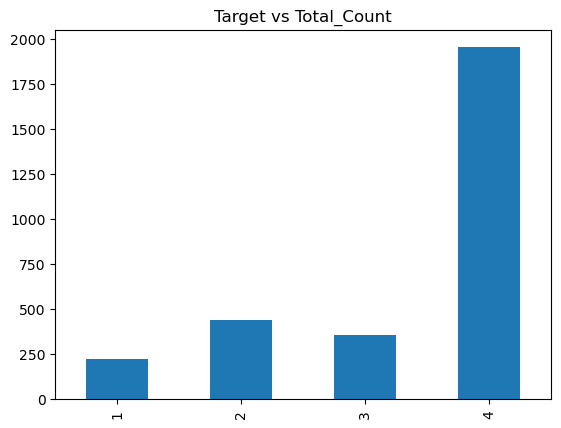

In [749]:
target_counts.plot.bar(title="Target vs Total_Count")

In [750]:
"""
There is a disproportionate amount in the dataset marked as "4: Non-Vulnerable Households".
Therefore, this dataset is biased.
"""

'\nThere is a disproportionate amount in the dataset marked as "4: Non-Vulnerable Households".\nTherefore, this dataset is biased.\n'

## 2.3 Amount of Missing/ Null Values

In [751]:
df_train_no_na = df_train.dropna()
df_test_no_na = df_test.dropna()

bad_rows1 = df_train_no_na.shape[0]
total_rows1 = len(df_train)
pct1 = bad_rows1/total_rows1*100

bad_rows2 = df_test_no_na.shape[0]
total_rows2 = len(df_test)
pct2 = bad_rows2/total_rows2*100

print(f'df_train: {bad_rows1} out of {total_rows1} rows contain missing values ({pct1} %).')
print(f'df_test: {bad_rows2} out of {total_rows2} rows contain missing values ({pct2} %).')

df_train: 156 out of 9557 rows contain missing values (1.6323113947891599 %).
df_test: 448 out of 23856 rows contain missing values (1.8779342723004695 %).


# 3.0 Data Cleaning

## 3.1 Immediate

In [752]:
# Are there any Features aka Columns that we can immediately remove?

features = []
for i in df_train.columns:
    features.append(i)
    
print(features)

['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadoci

In [753]:
# Double-checking ID: if they are all unique values, they can be discarded.

print(f'Are all values in Id unique, in df_train?: {df_train.shape[0] == len(df_train.Id.unique())}')
print(f'Are all values in Id unique, in df_test?: {df_test.shape[0] == len(df_test.Id.unique())}')

Are all values in Id unique, in df_train?: True
Are all values in Id unique, in df_test?: True


In [754]:
# Double-checking idhogar: if they are all unique values, they can be discarded.

print(f'Are all values in idhogar unique, in df_train?: {df_train.shape[0]==len(df_train.idhogar.unique())}')
print(f'Are all values in idhogar unique, in df_test?: {df_test.shape[0]==len(df_test.idhogar.unique())}')

Are all values in idhogar unique, in df_train?: False
Are all values in idhogar unique, in df_test?: False


In [755]:
# From the list of Features, plus referencing the Features description file (PDF), we will be removing several unneeded features:
# These are squared values, and only useful for Linear Regression models, thus will be removed: SQBescolari, SQBage, SQBhogar_total, SQBedjefe, SQBhogar_nin, SQBovercrowding, SQBdependency, SQBmeaned, agesq
# These are just 100% unique IDs, and thus will be removed: Id
# idhogar will not be removed yet, since it doesn't satisfy any of the above conditions.

# Original number of features
orig_features = len(df_train.columns)

# Columns to drop
columns_to_drop = [
    'Id',
    'SQBescolari',
    'SQBage',
    'SQBhogar_total',
    'SQBedjefe',
    'SQBhogar_nin',
    'SQBovercrowding',
    'SQBdependency',
    'SQBmeaned',
    'agesq']

# Dropping the specified columns
try:
    df_train.drop(columns=columns_to_drop, inplace=True)
    df_test.drop(columns=columns_to_drop, inplace=True)
    print("Columns in both datasets (df_train, df_test) have been successfully dropped.")
except:
    print("Something went wrong. Column dropping NOT successful.")

# Number of features removed
print(f'We have removed {orig_features - len(df_train.columns)} features.')



Columns in both datasets (df_train, df_test) have been successfully dropped.
We have removed 10 features.


## 3.2 Zero-Variance Columns

In [756]:
# Let's now check if there are any Features that have a variance of 0, i.e. the values are ALL the SAME.

df_variance = pd.DataFrame(np.var(df_train,0), columns=['variance'])
df_variance.sort_values(by='variance').head(15)
print('Below are columns with variance 0.')
features1 = list((df_variance[df_variance['variance'] == 0]).index)
print(features1)

Below are columns with variance 0.
['elimbasu5']


c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [757]:
print("df_train:\n", df_train['elimbasu5'].value_counts())
print("\ndf_test:\n", df_test['elimbasu5'].value_counts())

df_train:
 0    9557
Name: elimbasu5, dtype: int64

df_test:
 0    23852
1        4
Name: elimbasu5, dtype: int64


In [758]:
# elimbasu5 : 1 if rubbish disposal mainly by throwing in river, creek or sea.
# Since ALL the values in "elimbasu5" are zero in df_train, and only 4 out of 23852 in df_test are not 0, it's safe to remove the Feature.

try:
    df_train.drop(['elimbasu5'], axis=1, inplace=True)
    df_test.drop(['elimbasu5'], axis=1, inplace=True)
    print(f'Column "elimbasu5" successfuly dropped from both datasets.')
except:
    print(f'Something went wrong. Column dropping NOT successful.')

Column "elimbasu5" successfuly dropped from both datasets.


## 3.3 Closer Inspection

### 3.3.1 The "area1" and "area2" Columns.

In [759]:
# Upon closer inspection, we realize that area1 and area2 are probably related.
# area1 = 1: zona urbana
# area2 = 2: zona rural
# Let's check for relationships, and confirm the hypothesis.

var1 = "area1"
var2 = "area2"
contingency_tab = pd.crosstab(df_train[var1], df_train[var2])

import scipy.stats
b = scipy.stats.chi2_contingency(contingency_tab)
chi_square_statistic = b[0]  # Directly retrieving the chi-square statistic
df = b[2]  # Degrees of freedom
print("Degree of Freedom:-", df)

alpha=0.05
from scipy.stats import chi2
critical_value=chi2.ppf(q=1-alpha, df=df)
print('critical_value:', critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic, df=df)
print('p-value:', p_value)
print('Significance level: ', alpha)
print('Degree of Freedom: ', df)

print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
print('')

if chi_square_statistic>=critical_value:
    print(f'Chi-Square >= Crit Value: \nYES, there IS a relationship between 2 categorical variables, "{var1}" and "{var2}."')
else:
    print(f'NO, There is NO relationship between 2 categorical variables, "{var1}" and "{var2}."')
    
if p_value<=alpha:
    print(f'\nP-Value <= alpha: \nYES, there IS a relationship between 2 categorical variables, "{var1}" and "{var2}."')
else:
    print(f'\nNO, There is NO relationship between 2 categorical variables, "{var1}" and "{var2}."')


Degree of Freedom:- 1
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 9552.097856827806
critical_value: 3.841458820694124
p-value: 0.0

Chi-Square >= Crit Value: 
YES, there IS a relationship between 2 categorical variables, "area1" and "area2."

P-Value <= alpha: 
YES, there IS a relationship between 2 categorical variables, "area1" and "area2."


count    9557.000000
mean        0.714555
std         0.451650
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: area1, dtype: float64

count    9557.000000
mean        0.285445
std         0.451650
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: area2, dtype: float64


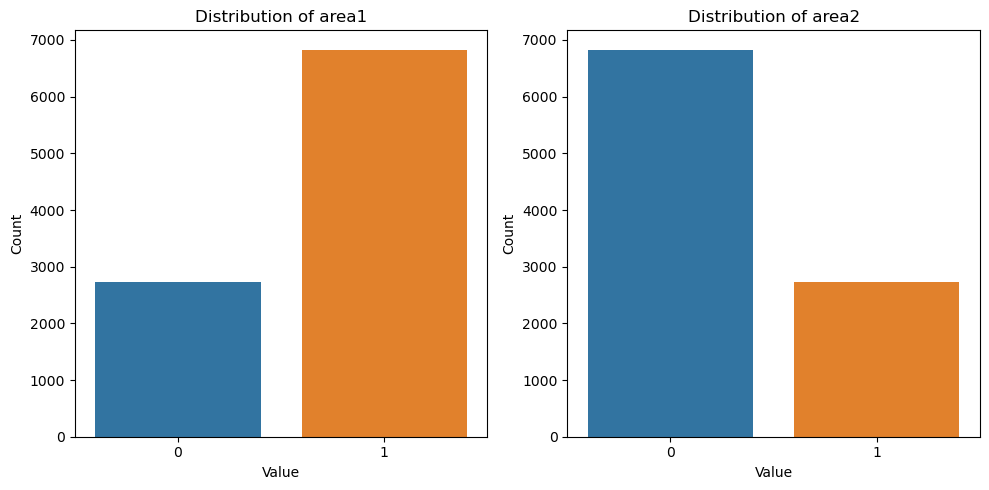

In [760]:
# Investigating area1 and area2

print(df_train['area1'].describe())
print("")
print(df_train['area2'].describe())

# Plotting the 'area1' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=df_train['area1'].value_counts().index, y=df_train['area1'].value_counts().values)
plt.title("Distribution of area1")
plt.xlabel("Value")
plt.ylabel("Count")

# Plotting the 'area2' column
plt.subplot(1, 2, 2)
sns.barplot(x=df_train['area2'].value_counts().index, y=df_train['area2'].value_counts().values)
plt.title("Distribution of area2")
plt.xlabel("Value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [761]:
# Our investigations seems to highly support our hypothesis that area1 and area2 are directly inversely correlated.
# As such, we will be dropping the "area2" column.

try:
    df_train.drop(['area2'], axis=1, inplace=True)
    df_test.drop(['area2'], axis=1, inplace=True)
    print(f'Column "area2" dropped from both datasets successfully.')
except:
    print(f'Something went wrong. Column dropping NOT successful.')

Column "area2" dropped from both datasets successfully.


### 3.3.2 The "male" and "female" Columns.

In [762]:
# Upon closer inspection, we realize that male and female are probably related.
# male = 1 if male
# female = 1 if female
# Let's check for relationships, and confirm the hypothesis.

var1 = "male"
var2 = "female"
contingency_tab = pd.crosstab(df_train[var1], df_train[var2])

import scipy.stats
b = scipy.stats.chi2_contingency(contingency_tab)
chi_square_statistic = b[0]  # Directly retrieving the chi-square statistic
df = b[2]  # Degrees of freedom
print("Degree of Freedom:-", df)

alpha=0.05
from scipy.stats import chi2
critical_value=chi2.ppf(q=1-alpha, df=df)
print('critical_value:', critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic, df=df)
print('p-value:', p_value)
print('Significance level: ', alpha)
print('Degree of Freedom: ', df)

print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
print('')

if chi_square_statistic>=critical_value:
    print(f'Chi-Square >= Crit Value: \nYES, there IS a relationship between 2 categorical variables, "{var1}" and "{var2}."')
else:
    print(f'NO, There is NO relationship between 2 categorical variables, "{var1}" and "{var2}."')
    
if p_value<=alpha:
    print(f'\nP-Value <= alpha: \nYES, there IS a relationship between 2 categorical variables, "{var1}" and "{var2}."')
else:
    print(f'\nNO, There is NO relationship between 2 categorical variables, "{var1}" and "{var2}."')


Degree of Freedom:- 1
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 9552.996013779084
critical_value: 3.841458820694124
p-value: 0.0

Chi-Square >= Crit Value: 
YES, there IS a relationship between 2 categorical variables, "male" and "female."

P-Value <= alpha: 
YES, there IS a relationship between 2 categorical variables, "male" and "female."


count    9557.000000
mean        0.483415
std         0.499751
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: male, dtype: float64

count    9557.000000
mean        0.516585
std         0.499751
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: female, dtype: float64


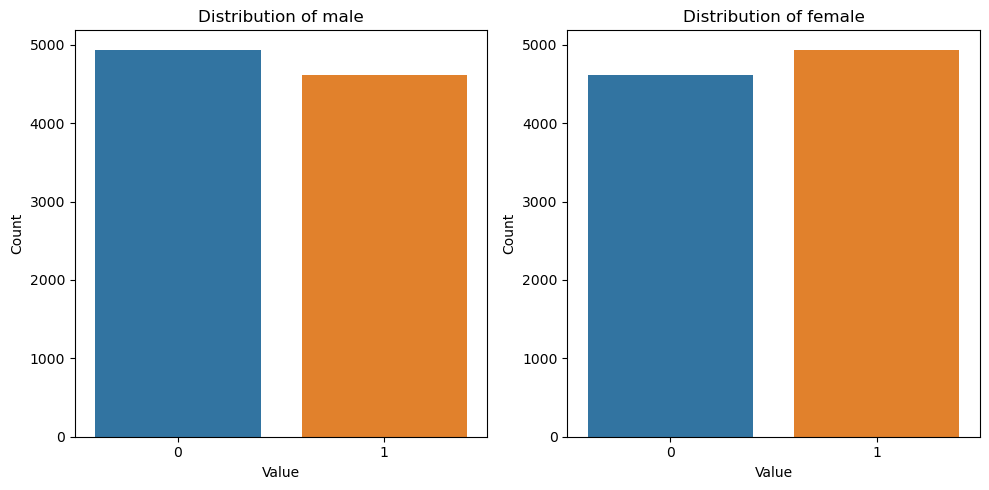

In [763]:
# Investigating male and female

print(df_train['male'].describe())
print("")
print(df_train['female'].describe())

# Plotting the 'male' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=df_train['male'].value_counts().index, y=df_train['male'].value_counts().values)
plt.title("Distribution of male")
plt.xlabel("Value")
plt.ylabel("Count")

# Plotting the 'female' column
plt.subplot(1, 2, 2)
sns.barplot(x=df_train['female'].value_counts().index, y=df_train['female'].value_counts().values)
plt.title("Distribution of female")
plt.xlabel("Value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [764]:
# Our investigations seems to highly support our hypothesis that male and female are directly inversely correlated.
# As such, we will be dropping the "female" column.

try:
    df_train.drop(['female'], axis=1, inplace=True)
    df_test.drop(['female'], axis=1, inplace=True)
    print(f'Column "female" dropped from both datasets successfully.')
except:
    print(f'Something went wrong. Column dropping NOT successful.')

Column "female" dropped from both datasets successfully.


## 3.4 Finding and Fixing "Non-Numerical Columns"

In [765]:
# What kinds of variables are found in the TRAIN dataset?

print(df_train.info())

print('\nIntegers: ')
print(df_train.select_dtypes(np.int64).columns)

print('\nFloats: ')
print(df_train.select_dtypes(np.float64).columns)

print('\nObjects: ')
print(df_train.select_dtypes(object).columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 130 entries, v2a1 to Target
dtypes: float64(5), int64(121), object(4)
memory usage: 9.5+ MB
None

Integers: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5',
       'lugar6', 'area1', 'age', 'Target'],
      dtype='object', length=121)

Floats: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding'], dtype='object')

Objects: 
Index(['idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [766]:
# From the above, we see that there are 4 "object" datatypes.
# Since this is machine learning, we will need to convert all of the values of Features into numerical data.
# Let's see which of these Features contain non-numerical values.

for i in df_train.columns:
    a = df_train[i].dtype
    if a == 'object':
        print(i)

df_train.select_dtypes('object').head()

idhogar
dependency
edjefe
edjefa


,idhogar,dependency,edjefe,edjefa
0,21eb7fcc1,no,10,no
1,0e5d7a658,8,12,no
2,2c7317ea8,8,no,11
3,2b58d945f,yes,11,no
4,2b58d945f,yes,11,no


In [767]:
"""
Looks like we have to take care of the 4 above Features.
"""

'\nLooks like we have to take care of the 4 above Features.\n'

### 3.4.1 The "idhogar" Column

In [768]:
# According to the PDF, idhogar = "Household level identifier"
# Let's see the values associated with "idhogar"

df_train['idhogar'].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
b7a0b59d7    11
4476ccd4c    11
             ..
9f6b2b309     1
75226a178     1
1637ac45b     1
0194d569d     1
21eb7fcc1     1
Name: idhogar, Length: 2988, dtype: int64

In [769]:
"""
The values contained within idhogar look to be unique ids in which Household members are grouped in, e.g. 13 people belong to family "fd8a6d014".
Furthermore, in an earlier step, we have identified that idhogar does NOT contain 100% unique values.
As such, we will NOT be removing it.
"""

'\nThe values contained within idhogar look to be unique ids in which Household members are grouped in, e.g. 13 people belong to family "fd8a6d014".\nFurthermore, in an earlier step, we have identified that idhogar does NOT contain 100% unique values.\nAs such, we will NOT be removing it.\n'

### 3.4.2 The "dependency" Column

In [770]:
# "dependency" is described as "Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)", thus, should be an important Feature.
# Let's see what "dependency values" are like.

df_train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [771]:
# It seems that survey respondents have responded usually with a "yes", or a "no", whilst the rest of the responses seem to have been correctly calculated into floats.
# As such, we will convert "no"s to a value of 0, and "yes" into the MEAN of the responses.

from sklearn.impute import SimpleImputer

# Convert 'yes' to the mean and 'no' to 0 in 'dependency' column for both train and test
# In order for the Imputer to work, we must first replace "yes"es into NaNs.
# At the same time, we also convert "no"s to 0s at one shot too.
for dataset in [df_train, df_test]:
    dataset['dependency'] = dataset['dependency'].replace('yes', 'NaN').replace('no', '0').astype(float)

# Create the imputer object with strategy as mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the 'dependency' column of both datasets
try:
    df_train['dependency'] = imputer.fit_transform(df_train[['dependency']])
    df_test['dependency'] = imputer.transform(df_test[['dependency']])
    print('Converting values in "dependency" column in both datasets successful.')
except:
    print('Something went wrong. Converting values in "dependency" NOT successful.')

Converting values in "dependency" column in both datasets successful.


In [772]:
# Since this is machine learning, we will need to convert all of the values of Features into numerical data.
# Let's see which non-numerical Features are left.

for i in df_train.columns:
    a = df_train[i].dtype
    if a == 'object':
        print(i)

idhogar
edjefe
edjefa


### 3.4.3 The "edjefe" and "edjefa" Columns

In [773]:
# According to the PDF, the definitions of edjefe and edjefa are as follows:
# 102. edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
# 103. edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

# Let's take a look at the values of both.

print(df_train['edjefe'].value_counts())


no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64


In [774]:
print(df_train['edjefa'].value_counts())

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64


In [775]:
# According to the PDF, the definitions of edjefe and edjefa are as follows:
# 102. edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
# 103. edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

# As referenced above, we should be converting all yes'es to "1", and all no's to "0".

# Define the converter function using the calculated MODE
# using function name "converter2" just to avoid confusion from the previous "converter1"; using back converter1 would probably save memory/ resources.
# Also note, that we're converting yes'es and no's into INTEGERS, because as the values show, all responses are in INTEGER values.
def converter2(i): 
    if i == 'yes':
        return int(1)
    elif i == 'no':
        return int(0)
    else:
        return int(i)

# Apply the converter function to the 'dependency' column
try:
    # edjefe
    df_train['edjefe'] = df_train['edjefe'].apply(converter2)
    df_test['edjefe'] = df_test['edjefe'].apply(converter2)
    
    # edjefa
    df_train['edjefa'] = df_train['edjefa'].apply(converter2)
    df_test['edjefa'] = df_test['edjefa'].apply(converter2)
    
    print('Converting values in "edjefe" and "edjefa" columns in both datasets successful.')
except:
    print('Something went wrong. Converting values in "edjefe" and "edjefa" NOT successful.')

Converting values in "edjefe" and "edjefa" columns in both datasets successful.


In [776]:
# Since this is machine learning, we will need to convert all of the values of Features into numerical data.
# Let's see which non-numerical Features are left.

object_dtypes_found = False

for i in df_train.columns:
    if df_train[i].dtype == 'object' and (i != "idhogar"):
        print(i)
        object_dtypes_found = True

if not object_dtypes_found:
    print('(Except for "idhogar"...)\nNo Features found with datatype=object. \nAll values are now in numerical format.')


(Except for "idhogar"...)
No Features found with datatype=object. 
All values are now in numerical format.


In [777]:
# We have decided to hold on to "idhogar" for the meanwhile, until we're sure that it can be removed safely.

## 3.5 Null or Missing Values.

In [778]:
# Let's now check if there are any Null, NaN, and/ or Missing values.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df_train)

Your selected dataframe has 130 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
rez_esc,7928,83.0
v18q1,7342,76.8
v2a1,6860,71.8
meaneduc,5,0.1


In [779]:
"""
From the above, we can see that there are 4 Features that contain various amounts of missing values, and needs fixing.
"""

'\nFrom the above, we can see that there are 4 Features that contain various amounts of missing values, and needs fixing.\n'

### 3.5.1 The "meaneduc" Column

In [780]:
# Let's explore "meaneduc" first, since it has the least amount of missing values.
# meaneduc = average years of education for adults (18+)

"""
Column Name: meaneduc
Number of Missing Values: 5
Percentage of Missing Values: 0.05231767290990897 %
"""

print(df_train['meaneduc'].value_counts())

missing_values = df_train['meaneduc'].isnull().sum()
print(f"Number of missing values in 'meaneduc': {missing_values}")

6.000000     846
11.000000    491
9.000000     398
8.500000     341
10.000000    330
            ... 
23.500000      3
37.000000      3
0.333333       3
32.000000      2
27.000000      2
Name: meaneduc, Length: 155, dtype: int64
Number of missing values in 'meaneduc': 5


In [781]:
# Columns related to average years of education for adults (18+):
# - edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
# - edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
# - instlevel1, =1 no level of education
# - instlevel2, =1 incomplete primary 

missing_rows = df_train[df_train['meaneduc'].isnull()].head()
investigate = ['edjefe','edjefa','instlevel1','instlevel2']

missing_rows[investigate][missing_rows[investigate]['instlevel1'] > 0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [782]:
# From the above, we find that meaneduc is null when all the values for edjefe, edjefa, instlevel1, and instlevel2 are all 0.
# As such, we can fix the 5 missing rows by updating all null values to 0.

try:
    df_train['meaneduc'].fillna(value=int(0), inplace=True)
    df_test['meaneduc'].fillna(value=int(0), inplace=True)
    print('Converting values in "meaneduc" column in both datasets successful.')
except:
    print('Something went wrong. Converting values in "meaneduc" NOT successful.')
    
print("\n", df_train['meaneduc'].value_counts())
missing_values = df_train['meaneduc'].isnull().sum()
print(f"Number of missing values in 'meaneduc': {missing_values}")

Converting values in "meaneduc" column in both datasets successful.

 6.000000     846
11.000000    491
9.000000     398
8.500000     341
10.000000    330
            ... 
23.500000      3
37.000000      3
0.333333       3
32.000000      2
27.000000      2
Name: meaneduc, Length: 155, dtype: int64
Number of missing values in 'meaneduc': 0


### 3.5.2 The "v2a1" Column

In [783]:
"""
Column Name: v2a1
Number of Missing Values: 6860
Percentage of Missing Values: 71.7798472323951 %
"""

# v2a1 = Monthly rent payment

print(df_train['v2a1'].value_counts())
missing_values = df_train['v2a1'].isnull().sum()
print(f"Number of missing values in 'v2a1': {missing_values}")

150000.0    233
100000.0    181
200000.0    159
120000.0    149
50000.0     118
           ... 
118097.0      1
108000.0      1
119813.0      1
249896.0      1
25310.0       1
Name: v2a1, Length: 157, dtype: int64
Number of missing values in 'v2a1': 6860


In [784]:
# We can either fill the missing values with the MEAN,
# or we can fill the missing values with a 0, if the survey responses were accurate in saying that "missing values" literally mean "I'm paying $0 in monthly rents",
# since the person may have:
# - already bought the house in full, 
# - is paying installments on it, 
# - are living in a borrowed house/ friend's/ relative's/ somewhere else, and so on.

# Upon closer inspection, comparing the values in the following columns with v2a1 seems to suggest that the missing values is INDEED highly correlated:
# - tipovivi1, =1 own and fully paid house
# - tipovivi2, =1 own, paying in installments
# - tipovivi3, =1 rented
# - tipovivi4, =1 precarious
# - tipovivi5, =1 other(assigned, borrowed)

# Let's check for correlation, and confirm the hypothesis.

var1 = "v2a1"
var2 = "tipovivi3"
contingency_tab = pd.crosstab(df_train[var1], df_train[var2])

import scipy.stats
b = scipy.stats.chi2_contingency(contingency_tab)
chi_square_statistic = b[0]  # Directly retrieving the chi-square statistic
df = b[2]  # Degrees of freedom
print("Degree of Freedom:-", df)

alpha=0.05
from scipy.stats import chi2
critical_value=chi2.ppf(q=1-alpha, df=df)
print('critical_value:', critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic, df=df)
print('p-value:', p_value)
print('Significance level: ', alpha)
print('Degree of Freedom: ', df)

print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
print('')

if chi_square_statistic>=critical_value:
    print(f'Chi-Square >= Crit Value: \nYES, there IS a relationship between 2 categorical variables, "{var1}" and "{var2}."')
else:
    print(f'NO, There is NO relationship between 2 categorical variables, "{var1}" and "{var2}."')
    
if p_value<=alpha:
    print(f'\nP-Value <= alpha: \nYES, there IS a relationship between 2 categorical variables, "{var1}" and "{var2}."')
else:
    print(f'\nNO, There is NO relationship between 2 categorical variables, "{var1}" and "{var2}."')

Degree of Freedom:- 156
critical_value: 186.14575078141743
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  156
chi-square statistic: 1004.7492784813417
critical_value: 186.14575078141743
p-value: 0.0

Chi-Square >= Crit Value: 
YES, there IS a relationship between 2 categorical variables, "v2a1" and "tipovivi3."

P-Value <= alpha: 
YES, there IS a relationship between 2 categorical variables, "v2a1" and "tipovivi3."


In [785]:
# From the above, our hypothesis seems to check out.

# As such, we will choose to assign missing values to "0"s.
new_value = float(0)

# Fill the missing values in the 'v2a1' column with the new value.
try:
    df_train['v2a1'].fillna(new_value, inplace=True)
    df_test['v2a1'].fillna(new_value, inplace=True)
    print(f'Column "v2a1" updated with new values in both datasets successfully.')
except:
    print(f'Something went wrong. Updating values NOT successful.')

# We will also drop "tipovivi3" as it is equals to "1 = rented", which is already represented by v2a1.
try:
    df_train.drop(['tipovivi3'], axis=1, inplace=True)
    df_test.drop(['tipovivi3'], axis=1, inplace=True)
    print(f'Column tipovivi3 dropped from both datasets successfully.')
except:
    print(f'Something went wrong. Column dropping NOT successful.')
    
# Print the updated 'v2a1' column
print("\n", df_train['v2a1'].value_counts())
missing_values = df_train['v2a1'].isnull().sum()
print(f"Number of missing values in 'v2a1': {missing_values}")

Column "v2a1" updated with new values in both datasets successfully.
Column tipovivi3 dropped from both datasets successfully.

 0.0         6889
150000.0     233
100000.0     181
200000.0     159
120000.0     149
            ... 
118097.0       1
108000.0       1
119813.0       1
249896.0       1
25310.0        1
Name: v2a1, Length: 157, dtype: int64
Number of missing values in 'v2a1': 0


### 3.5.3 The "v18q1" Column

In [786]:
"""
Column Name: v18q1
Number of Missing Values: 7342
Percentage of Missing Values: 76.82327090091033%
"""

# Next we explore "v18q1", which has 76.82327090091033% missing values.
# v18q1 = number of tablets household owns

print(df_train['v18q1'].value_counts())
missing_values = df_train['v18q1'].isnull().sum()
print(f"Number of missing values in 'v18q1': {missing_values}")

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64
Number of missing values in 'v18q1': 7342


In [787]:
# Upon closer inspection, we see that "v18q" = "owns a tablet", which should be highly correlative to v18q1 (number of tablets household owns).
# Let's see what it contains.

print(df_train['v18q'].value_counts())
missing_values = df_train['v18q'].isnull().sum()
print(f"Number of missing values in 'v18q': {missing_values}")

0    7342
1    2215
Name: v18q, dtype: int64
Number of missing values in 'v18q': 0


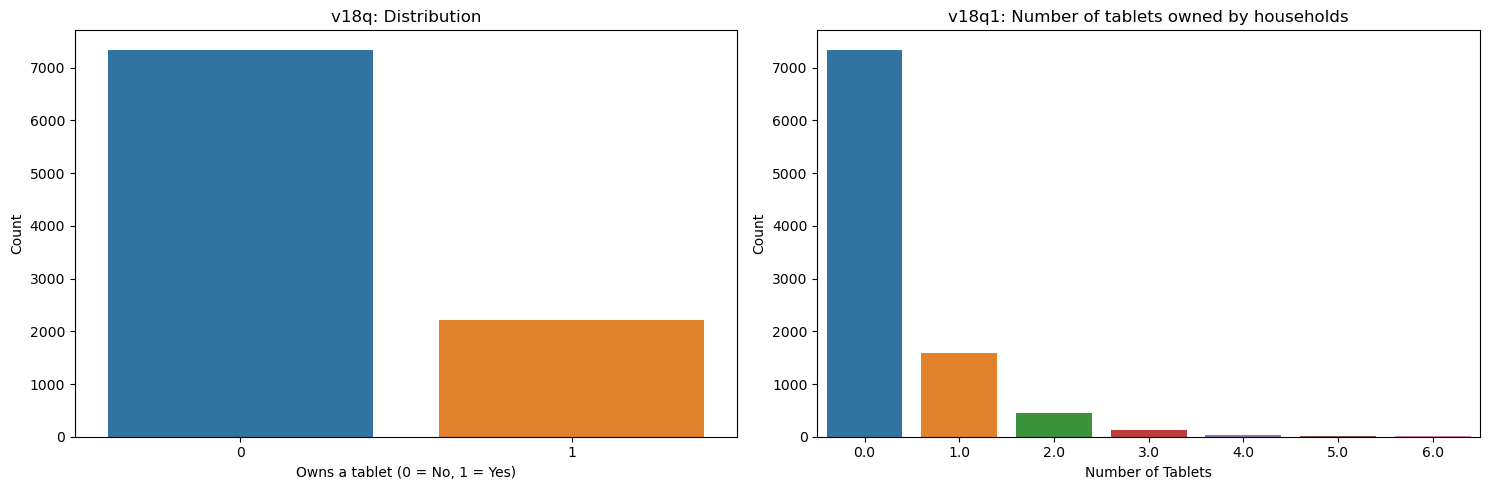

In [788]:
# Temporary handling of missing values
df_temp1 = df_train['v18q1'].fillna(value=int(0))

# Plotting the 'v18q' column
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=df_train['v18q'])
plt.title("v18q: Distribution")
plt.xlabel("Owns a tablet (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Plotting the 'v18q1' column
plt.subplot(1, 2, 2)
sns.countplot(x=df_temp1) # Corrected here
plt.title("v18q1: Number of tablets owned by households")
plt.xlabel("Number of Tablets")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

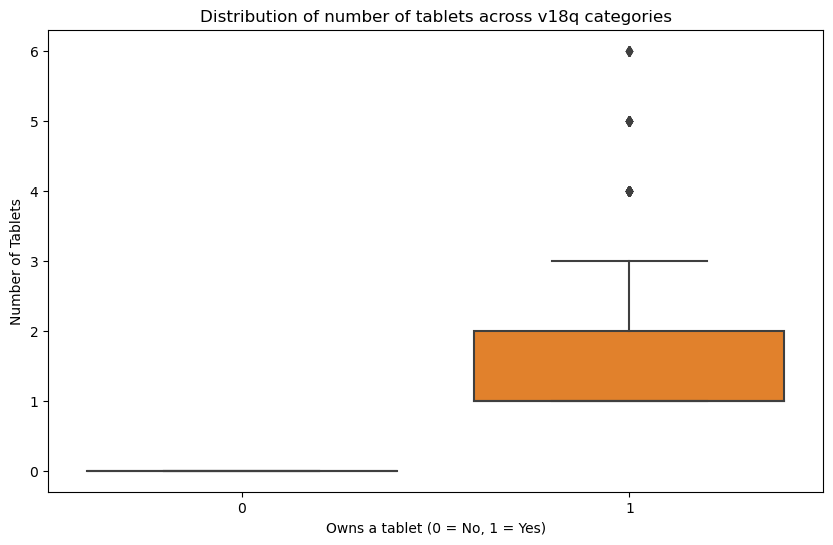

In [789]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['v18q'], y=df_temp1) # Corrected here
plt.title("Distribution of number of tablets across v18q categories")
plt.xlabel("Owns a tablet (0 = No, 1 = Yes)")
plt.ylabel("Number of Tablets")
plt.show()

In [790]:
# Our hypothesis seems to be highly supported by the above graphs.
# As such, we will DROP v18q,
# and convert all the missing values in v18q1 into a 0.

try:
    df_train.drop(['v18q'], axis=1, inplace=True)
    df_test.drop(['v18q'], axis=1, inplace=True)
    print(f'Column v18q dropped from both datasets successfully.')
except:
    print(f'Something went wrong. Column dropping NOT successful.')

# Fill the missing values in the 'v18q1' column with the new value.
new_value = int(0)

try:
    df_train['v18q1'].fillna(new_value, inplace=True)
    df_test['v18q1'].fillna(new_value, inplace=True)
    print(f'Values converted in v18q1 in both datasets successfully.')
except:
    print(f'Something went wrong. Converting values NOT successful.')

# Print the updated 'v18q1' column
print(f'\nv18q1 values:')
print(df_train['v18q1'].value_counts())
missing_values = df_train['v18q1'].isnull().sum()
print(f"Number of missing values in 'v18q1': {missing_values}")

Column v18q dropped from both datasets successfully.
Values converted in v18q1 in both datasets successfully.

v18q1 values:
0.0    7342
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64
Number of missing values in 'v18q1': 0


### 3.5.4 The "rez_esc" Column.

In [791]:
"""
Column Name: rez_esc
Number of Missing Values: 7928
Percentage of Missing Values: 82.95490216595167%
"""

# Next we explore "rez_esc".
# rez_esc = Years behind in school

print(df_train['rez_esc'].value_counts())
missing_values = df_train['rez_esc'].isnull().sum()
print(f"Number of missing values in 'rez_esc': {missing_values}")

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64
Number of missing values in 'rez_esc': 7928


In [792]:
# we immediately formed a hypothesis TBD!!!!!!
# Lets look at the data with not null values first.
df_train[df_train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [793]:
# From the above, we can see that the not-null values in rez_esc come from people ages 7 - 17 years old, which makes sense, as this is the schooling age.
# Let's see if this hypothesis is credible, by checking what the is-null values are for "age".

df_train[df_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [794]:
# From the above, we can deduce that the hypothesis is highly credible:
# - replies with null values are of the average of of 38 (24 - 97 years old),
# - not-null responses are of the average age of 12 (7 - 17 years old.)

# Let's look deeper, to confirm this hypothesis.
df_train.loc[
    (df_train['rez_esc'].isnull() & ((df_train['age'] > 7) & (df_train['age'] < 17)))]['age'].describe()


count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [795]:
# Indeed, almost all replies within the ages of 7-17 are not-nulls, except for 1.
# As such, it is safe and logical to replace all null values with a "0".

try:
    df_train['rez_esc'].fillna(value=int(0), inplace=True)
    df_test['rez_esc'].fillna(value=int(0), inplace=True)
    print('Updating values of "rez_esc" in both datasets successful.')
except:
    print('Something went wrong. Updating values NOT successful.')

# Print the updated 'rez_esc' column
print(f'\nrez_esc values:')
print(df_train['rez_esc'].value_counts())
missing_values = df_train['rez_esc'].isnull().sum()
print(f"Number of missing values in 'rez_esc': {missing_values}")

Updating values of "rez_esc" in both datasets successful.

rez_esc values:
0.0    9139
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64
Number of missing values in 'rez_esc': 0


### 3.5.5 Final Check for Missing Values

In [796]:
# Let's now check if there are any Null, NaN, and/ or Missing values *remaining*.

null_counts = df_train.isnull().sum() # Get the count of missing values for all columns
total_values = len(df_train) # Total number of rows
missing_info = [] # List to hold information about missing values

for column_name, null_count in null_counts.items():
    percentage_missing = (null_count / total_values) * 100
    if null_count > 0: # If there are missing values in the column
        missing_info.append({
            'Column Name': column_name,
            'Number of Missing Values': null_count,
            'Percentage of Missing Values': percentage_missing
        })

# Display the information
if missing_info:
    for info in missing_info:
        print(f"Column Name: {info['Column Name']}")
        print(f"Number of Missing Values: {info['Number of Missing Values']}")
        print(f"Percentage of Missing Values: {info['Percentage of Missing Values']} %\n")
else:
    print(f'Congratulations! There are 0 remaining columns with missing values.')


Congratulations! There are 0 remaining columns with missing values.


## 3.6 Exploring Data re: Poverty Levels ("Target")

### 3.6.1 Households with no "Head"

In [797]:
# Lets use Target value of the parent record (head of the household) and update rest. But before that lets check
# if all families has a head. 

households_head = df_train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = df_train.loc[df_train['idhogar'].isin(households_head[households_head == 0].index), :]

print(f'There are {households_no_head["idhogar"].nunique()} households without a "Head of Household".')

There are 15 households without a "Head of Household".


In [798]:
# Find households without a head and where Target value are different
households_no_head_matching = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print(f'There are {sum(households_no_head_matching == False)} households with no "Head", where the family members have mismatched values for "Target".')

There are 0 households with no "Head", where the family members have mismatched values for "Target".


### 3.6.2 Mismatched "Target" Values

In [799]:
# Find households which all members have 1 singular unique value for "Target", i.e. NOT mismatched.
matching = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Find households where "Target" values are mismatched.
mismatches = matching[matching != True]
print(f'There are {len(mismatches)} normal households, where the family members have mismatched values for "Target".')

There are 85 normal households, where the family members have mismatched values for "Target".


In [800]:
# Lets see what the data looks like for one of these "Mismatched Targets" households.
df_train[df_train['idhogar'] == mismatches.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [801]:
"""
From the above, we can see how some (3) of the family members have "Target" values of "3", and some (2) of them have "2", thus a mismatch.
This is what we're trying to fix.
"""

'\nFrom the above, we can see how some (3) of the family members have "Target" values of "3", and some (2) of them have "2", thus a mismatch.\nThis is what we\'re trying to fix.\n'

### 3.6.3 Fixing Mismatched "Target" Values

In [802]:
# Fixing the Poverty Level (Target) of each family member to match.

# Iterate through each household
for household in mismatches.index:
    # Find the correct label (for the head of household)
    correct_value = int(df_train[(df_train['idhogar'] == household) & (df_train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    df_train.loc[df_train['idhogar'] == household, 'Target'] = correct_value
print(f'Data has been fixed.')    

# Let's double-check to see if indeed, the data has been fixed.
filtered_df = df_train.sort_values('idhogar')[['idhogar', 'parentesco1', 'Target']].head(30)
print(filtered_df)

Data has been fixed.
        idhogar  parentesco1  Target
7472  001ff74ca            1       4
7471  001ff74ca            0       4
8159  003123ec2            0       2
8160  003123ec2            1       2
8161  003123ec2            0       2
8162  003123ec2            0       2
6472  004616164            1       2
6473  004616164            0       2
6606  004983866            1       3
6607  004983866            0       3
7792  005905417            0       2
7791  005905417            0       2
7790  005905417            1       2
3778  006031de3            0       4
3775  006031de3            1       4
3776  006031de3            0       4
3777  006031de3            0       4
2981  006555fe2            1       4
2977  006555fe2            0       4
2979  006555fe2            0       4
2978  006555fe2            0       4
2980  006555fe2            0       4
4706  00693f597            0       4
4708  00693f597            0       4
4709  00693f597            0       4
4707  00693f597  

In [803]:
# From the above, we can rest-assured that indeed, the data has been fixed.

# Groupby the household and figure out the number of unique values
matching = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
mismatches = matching[matching != True]

print(f'There are now {len(mismatches)} households where the family members have mismatched values for "Target".')
print('*Note: Only values in "df_train" has been fixed, since "df_test" does NOT contain the "Target" column.')


There are now 0 households where the family members have mismatched values for "Target".
*Note: Only values in "df_train" has been fixed, since "df_test" does NOT contain the "Target" column.


### 3.6.4 Overview of Poverty Levels

In [804]:
Poverty_level1 = df_train[df_train['v2a1'] !=0]
Poverty_level2 = df_test[df_test['v2a1'] !=0]
print(Poverty_level1.shape)
print(Poverty_level2.shape)

(2668, 128)
(6385, 127)


In [805]:
poverty_level1 = Poverty_level1.groupby('area1')['v2a1'].apply(np.median)
poverty_level2 = Poverty_level1.groupby('area1')['v2a1'].apply(np.median)

print("df_train:\n", poverty_level1)
print("\ndf_test:\n", poverty_level2)

df_train:
 area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

df_test:
 area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64


In [806]:
# For Rural area, if rent less than 8000, is below poverty level.
# For Urban area, if rent less than 140000, is below poverty level.

def p_level(x):
    if x < 8000:
        return('Below poverty.')    
    elif x > 140000:
        return('Above poverty.')
    elif x < 140000:
        return('If Urban: Below poverty. If Rural: Above poverty.')

In [807]:
c1 = Poverty_level1['v2a1'].apply(p_level)
c2 = Poverty_level2['v2a1'].apply(p_level)

print("df_train:\n", c1.shape)
print("\ndf_test:\n", c2.shape)

df_train:
 (2668,)

df_test:
 (6385,)


In [808]:
pd.crosstab(c1, Poverty_level1['area1'])

area1,0,1
v2a1,,
Above poverty.,139,1103
If Urban: Below poverty. If Rural: Above poverty.,306,1081


In [809]:
pd.crosstab(c2, Poverty_level2['area1'])

area1,0,1
v2a1,,
Above poverty.,172,2969
If Urban: Below poverty. If Rural: Above poverty.,726,2415


In [810]:
"""
df_train:
There are 139 + 1103 = 1242 people above poverty level, regardless of Rural or Urban.
The rest:
    Rural:
        Above poverty level = 139+306 = 445
    Urban:
        Above poverty level = 1103
        Below poverty level = 1081

df_test:
There are 172 + 2969 = 3141 people above poverty level, regardless of Rural or Urban.
The rest:
    Rural:
        Above poverty level = 172+726 = 898
    Urban:
        Above poverty level = 2969
        Below poverty level = 2415
"""

'\ndf_train:\nThere are 139 + 1103 = 1242 people above poverty level, regardless of Rural or Urban.\nThe rest:\n    Rural:\n        Above poverty level = 139+306 = 445\n    Urban:\n        Above poverty level = 1103\n        Below poverty level = 1081\n\ndf_test:\nThere are 172 + 2969 = 3141 people above poverty level, regardless of Rural or Urban.\nThe rest:\n    Rural:\n        Above poverty level = 172+726 = 898\n    Urban:\n        Above poverty level = 2969\n        Below poverty level = 2415\n'

## 3.7 Checking for Redundant Features

### 3.7.1 Logically Grouping Features by Datatype

In [811]:
# Ordering Features by datatype

id_ = ['idhogar', 'Target']

ind_bool = ['dis', 'male', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

# please remember that we have dropped several columns already previously, such as id, area2, elimbasu5, v18q, and so on.

households_w_heads = df_train.loc[df_train['parentesco1'] == 1, :]
households_w_heads = households_w_heads[id_ + hh_bool + hh_cont + hh_ordered]
print(f"We are now working with a dataframe with the following dimensions: {households_w_heads.shape}")

We are now working with a dataframe with the following dimensions: (2973, 94)


### 3.7.2 Redundant HH (household) Features

In [812]:
# Create correlation matrix
# Explicitly specifying numeric_only=True to avoid the warning
corr_matrix = households_w_heads.corr(numeric_only=True)

# Select upper triangle of correlation matrix
# Replacing np.bool with bool
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f"The following are Features that are highly correlated and should be considered for dropping:\n{to_drop}")

The following are Features that are highly correlated and should be considered for dropping:
['coopele', 'tamhog', 'hhsize', 'hogar_total']


In [813]:
"""
Upon further investigation...

- tamhog = size of the household
- tamviv = number of persons living in the household
- hhsize = household size
- hogar_total = # of total individuals in the household

- coopele, = 1: electricity from cooperative

All but 1, of these Features, are highly-correlated to each other.
"""

'\nUpon further investigation...\n\n- tamhog = size of the household\n- tamviv = number of persons living in the household\n- hhsize = household size\n- hogar_total = # of total individuals in the household\n\n- coopele, = 1: electricity from cooperative\n\nAll but 1, of these Features, are highly-correlated to each other.\n'

In [814]:
# Let's do a correlation matrix to confirm our hypothesis.
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


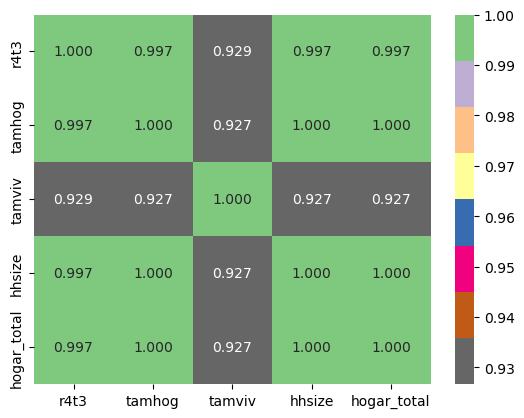

In [815]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.3f');

In [816]:
"""
As suspected, the above correlation-matrix reveals that, indeed, these features are very highly correlated to each other, given their extremely high scores.

During our analysis of the original 4 highly-correlated Features (['coopele', 'tamhog', 'hhsize', 'hogar_total']):

1. "coopele" is not related to the others, and will be taken out of consideration.

2. "r4t3" came out as a new Feature that is provably highly-correlated.
3. "r4t3" = Total persons in the household
4. "r4t3" is definitely highly-correlated with the rest of the Features that are being considered for dropping.

5. "tamviv" came out as a new Feature that is provably highly-correlated.
6. "tamviv" = number of persons living in the household
7. "tamviv" is definitely highly-correlated with the rest of the Features that are being considered for dropping.

8. both "r4t3" and "tamviv" did NOT appear in our initial analysis, and thus one of them (tamviv) will be the one Feature that is kept and not dropped.

"""

'\nAs suspected, the above correlation-matrix reveals that, indeed, these features are very highly correlated to each other, given their extremely high scores.\n\nDuring our analysis of the original 4 highly-correlated Features ([\'coopele\', \'tamhog\', \'hhsize\', \'hogar_total\']):\n\n1. "coopele" is not related to the others, and will be taken out of consideration.\n\n2. "r4t3" came out as a new Feature that is provably highly-correlated.\n3. "r4t3" = Total persons in the household\n4. "r4t3" is definitely highly-correlated with the rest of the Features that are being considered for dropping.\n\n5. "tamviv" came out as a new Feature that is provably highly-correlated.\n6. "tamviv" = number of persons living in the household\n7. "tamviv" is definitely highly-correlated with the rest of the Features that are being considered for dropping.\n\n8. both "r4t3" and "tamviv" did NOT appear in our initial analysis, and thus one of them (tamviv) will be the one Feature that is kept and not d

In [817]:
# To recap, 'coopele', 'tamhog', 'hhsize', 'hogar_total' were initially considered for dropping, 
# As such, we will be dropping all except one unrelated Feature, "coopele", and we're also keeping "tamviv" out of all the highly-correlated Features.

cols_to_drop = ['tamhog', 'hhsize', 'hogar_total', 'r4t3']
try:
    for df in [df_train, df_test]:
        df.drop(columns = cols_to_drop, inplace=True)
    print(f"Columns have been dropped successfully from both datasets:\n\t{cols_to_drop}")
except:
    print("Something went wrong. Column dropping NOT successful.")
    
print(f"We are now working with a dataframe of the following dimensions: {df_train.shape}")

Columns have been dropped successfully from both datasets:
	['tamhog', 'hhsize', 'hogar_total', 'r4t3']
We are now working with a dataframe of the following dimensions: (9557, 124)


### 3.7.3 Redundant IND (individual) Features

In [818]:
ind = df_train[id_ + ind_bool + ind_ordered]
ind.shape

(9557, 36)

In [819]:
# Create correlation matrix
corr_matrix = ind.corr(numeric_only=True)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

if to_drop:
    print(f"The following are Features that are highly correlated and should be considered for dropping:\n{to_drop}")
else:
    print("There are NO (0) Features left that should be considered for dropping.")

There are NO (0) Features left that should be considered for dropping.


In [820]:
"""
Since all EDA steps have been completed, we can finally remove the idhogar column.
"""

cols_to_drop = ['idhogar']
for df in [df_train, df_test]:
    df.drop(columns = cols_to_drop, inplace=True)

df_train.shape

(9557, 123)

# 4.0 Random Forest Classifier

## 4.1 RFC for DF_Train

### 4.1.1 Standard Scaler

In [821]:
# Applying Standard Scaler to datasets.

from sklearn.preprocessing import StandardScaler

X_data = df_train.drop('Target', axis=1)
Y_data = df_train.Target
X_data_col = X_data.columns

try:
    SS = StandardScaler()
    X_data = SS.fit_transform(X_data)
    X_data = pd.DataFrame(X_data, columns=X_data_col)
    print('Standard Scaler successfully applied. \nProceed to working on dataset "X_data".')
except:
    print("Something went wrong. Applying Standard Scaler NOT successful.")

Standard Scaler successfully applied. 
Proceed to working on dataset "X_data".


### 4.1.2 Model Fitting

In [822]:
# Initial Model-Fitting.

from sklearn.model_selection import train_test_split

test_size = 0.25
random_state = 8888 # Because Group8 is AWESOOOOME!!!!

try:
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_data, 
        Y_data,
        test_size = test_size,
        stratify = Y_data,
        random_state = random_state)
    print(f"Model-Fitting successful, with test_size={test_size}, and random_state={random_state}.\nBecause Group 8 is AWESOME!!!")
except:
    print("Something went wrong. Model-Fitting NOT successful.")

Model-Fitting successful, with test_size=0.25, and random_state=8888.
Because Group 8 is AWESOME!!!


### 4.1.3 GridSearchCV

In [823]:
# Using GridSearchCV to identify the best parameters for the model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

rfc1 = RandomForestClassifier(random_state = random_state)

"""
The original parameters are as follows:

parameters = {'n_estimators':[10,50,100,200],
              'max_depth':[5,10,15,20],
              'max_features': ['sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
              }
              
We have run several iterations, and acquired the best results,
i.e. n_estimators: 100, max_depth: 20, max_features: None, and criterion: entropy.
As such, the code has been shortened as per below, to save on computation time.
"""

parameters = {'n_estimators':[100],
              'max_depth':[20],
              'max_features': [None],
              'criterion': ['entropy']
              }

grid = zip([rfc1], [parameters])

best_ = None
for i, j in grid:
    # "cv" means k-fold cross validation.
    # "n_jobs" means num of processing cores we are using on the computer for computation purposes.
    a = GridSearchCV(i, param_grid=j, cv=3, n_jobs=4, scoring='accuracy')
    a.fit(X_train, Y_train)
    if best_ is None:
        best_ = a
    elif a.best_score_ > best_.best_score_:
        best_ = a       

print ("Best CV Score:", best_.best_score_)
print ("Best Model Parameters:", best_.best_params_)
print("Best Estimator:", best_.best_estimator_)

Best CV Score: 0.9133528673084973
Best Model Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=20, max_features=None,
                       random_state=8888)


In [824]:
# Refitting the RFC model with the new GSCV "best parameters".

rfc1 = best_.best_estimator_
Model = rfc1.fit(X_train, Y_train)
pred = Model.predict(X_test)

print(f'Model Score for df_train: {Model.score(X_train, Y_train)}')
print("*Note: We did several runs, and made several tweaks, and increased the score from about 0.91xxx, eventually to 1.0.")
print(f'\nModel Score for df_test: {Model.score(X_test, Y_test)}')

Model Score for df_train: 1.0
*Note: We did several runs, and made several tweaks, and increased the score from about 0.91xxx, eventually to 1.0.

Model Score for df_test: 0.9610878661087866


### 4.1.4 Top 50 Features

In [825]:
# Determining Top-50 most important features.

Important_features = pd.DataFrame(Model.feature_importances_, X_data_col, columns=['feature_importance'])
Top50Features = Important_features.sort_values(by='feature_importance', ascending=False).head(50).index

print("The following are the Top50Features: \n", Top50Features)

The following are the Top50Features: 
 Index(['meaneduc', 'dependency', 'hogar_nin', 'overcrowding', 'qmobilephone',
       'edjefe', 'rooms', 'v2a1', 'edjefa', 'r4t1', 'r4t2', 'r4h2', 'r4h3',
       'r4m3', 'age', 'bedrooms', 'cielorazo', 'v18q1', 'hogar_adul', 'r4m2',
       'tamviv', 'paredblolad', 'eviv3', 'lugar1', 'area1', 'pisomoscer',
       'r4h1', 'r4m1', 'paredpreb', 'etecho1', 'energcocinar2', 'etecho3',
       'television', 'epared2', 'etecho2', 'epared3', 'eviv2', 'energcocinar3',
       'lugar3', 'tipovivi1', 'pisocemento', 'lugar5', 'escolari', 'lugar4',
       'paredmad', 'tipovivi5', 'paredzocalo', 'sanitario3', 'hogar_mayor',
       'eviv1'],
      dtype='object')


In [826]:
list1 = []
for i in Top50Features:
    if i not in X_data_col:
        print(i)
        list1.append(i)

if list1:
    print("The above are Features that are NOT included in the Top50Features list. \nPlease rectify!")
else:
    print("There are no Features that are not already included in the Top50Features list.")
    X_data_Top50 = X_data[Top50Features]
    print('X_data updated to X_data[Top50Features] = "X_data_Top50". \nProceed to working with this new dataset.')


There are no Features that are not already included in the Top50Features list.
X_data updated to X_data[Top50Features] = "X_data_Top50". 
Proceed to working with this new dataset.


### 4.1.5 df_train Predictions

The following are the results for "Target" in DF_TRAIN using Group8's optimized RFC model:
Target: 1 - Count: 192
Target: 4 - Count: 1559
Target: 2 - Count: 351
Target: 3 - Count: 288

Total number of predictions: 2390
Number of rows in X_test (df_train): 2390


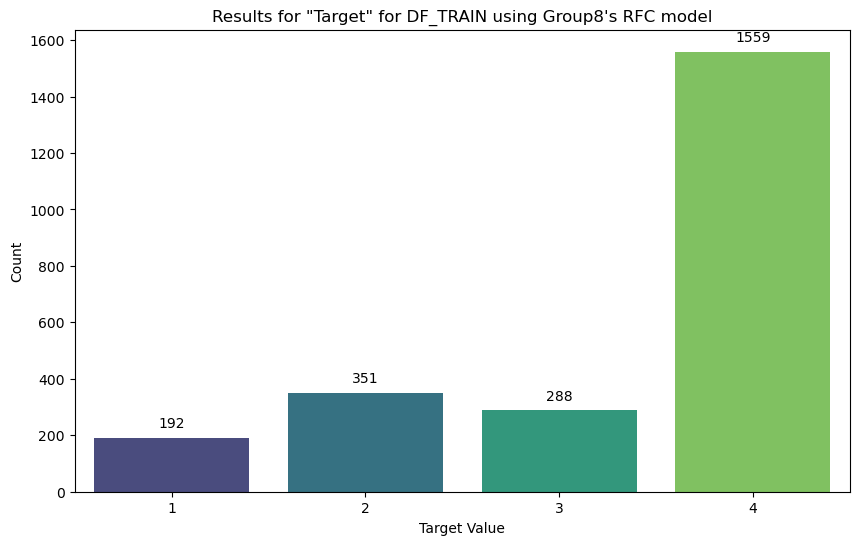

In [827]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(
    X_data_Top50,
    Y_data,
    test_size=test_size,
    stratify=Y_data,
    random_state=random_state)

Model = rfc1.fit(X_train, Y_train)
pred = Model.predict(X_test)

# Grouping the predictions by their counts
pred_counts = Counter(pred)

print("The following are the results for \"Target\" in DF_TRAIN using Group8's optimized RFC model:")
total_count = 0
for value, count in pred_counts.items():
    print(f"Target: {value} - Count: {count}")
    total_count += count

print("\nTotal number of predictions:", total_count)
print("Number of rows in X_test (df_train):", len(X_test))

# Convert the Counter object to a DataFrame for easy plotting
pred_counts_df = pd.DataFrame(list(pred_counts.items()), columns=['Target', 'Count'])

# Plotting the results
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Target', y='Count', data=pred_counts_df, palette='viridis')

plt.title('Results for "Target" for DF_TRAIN using Group8\'s RFC model')
plt.xlabel('Target Value')
plt.ylabel('Count')

# Annotating the bars with the actual values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

plt.show()


In [828]:
"""
The above results look reasonably acceptable, and as such, we will proceed.
"""

'\nThe above results look reasonably acceptable, and as such, we will proceed.\n'

### 4.1.6 Confusion Matrix

Confusion Matrix:
[[ 185    0    0    9]
 [   5  347    5   33]
 [   1    2  280   22]
 [   1    2    3 1495]]

Detailed Explanation:
Class 0: True Positive: 185, False Negative: 9, False Positive: 7, True Negative: 2205
Class 1: True Positive: 347, False Negative: 43, False Positive: 4, True Negative: 1996
Class 2: True Positive: 280, False Negative: 25, False Positive: 8, True Negative: 2077
Class 3: True Positive: 1495, False Negative: 6, False Positive: 64, True Negative: 895

Legend:
True Positive (TP): Actual and predicted class match.
False Negative (FN): Actual class was positive but predicted as negative.
False Positive (FP): Actual class was negative but predicted as positive.
True Negative (TN): Actual and predicted class are negative.


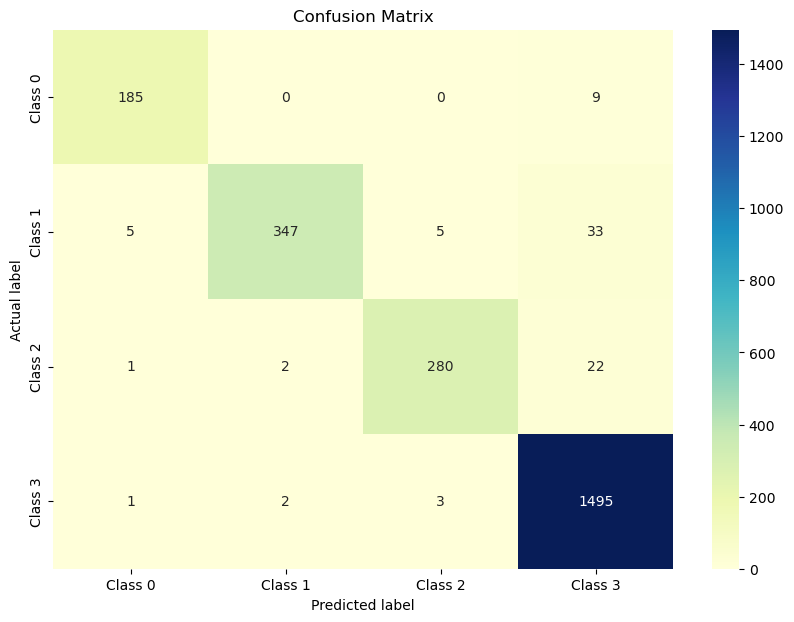

In [829]:
from sklearn.metrics import confusion_matrix

# Getting the confusion matrix
cm = confusion_matrix(Y_test, pred)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(cm)

# Explaining the confusion matrix
print("\nDetailed Explanation:")
print(f"Class 0: True Positive: {cm[0][0]}, False Negative: {sum(cm[0][1:])}, False Positive: {sum(cm[i][0] for i in range(1,4))}, True Negative: {sum(cm[i][j] for i in range(1,4) for j in range(1,4)) + sum(cm[i][0] for i in range(1,4)) + sum(cm[0][1:])}")
print(f"Class 1: True Positive: {cm[1][1]}, False Negative: {cm[1][0] + sum(cm[1][2:])}, False Positive: {sum(cm[i][1] for i in range(0,4) if i != 1)}, True Negative: {sum(cm[i][j] for i in range(0,4) for j in range(0,4) if i != 1 and j != 1)}")
print(f"Class 2: True Positive: {cm[2][2]}, False Negative: {cm[2][0] + cm[2][1] + cm[2][3]}, False Positive: {sum(cm[i][2] for i in range(0,4) if i != 2)}, True Negative: {sum(cm[i][j] for i in range(0,4) for j in range(0,4) if i != 2 and j != 2)}")
print(f"Class 3: True Positive: {cm[3][3]}, False Negative: {cm[3][0] + cm[3][1] + cm[3][2]}, False Positive: {sum(cm[i][3] for i in range(0,3))}, True Negative: {sum(cm[i][j] for i in range(0,3) for j in range(0,3)) + sum(cm[i][3] for i in range(0,3)) + sum(cm[3][0:3])}")

print("\nLegend:")
print("True Positive (TP): Actual and predicted class match.")
print("False Negative (FN): Actual class was positive but predicted as negative.")
print("False Positive (FP): Actual class was negative but predicted as positive.")
print("True Negative (TN): Actual and predicted class are negative.")

# Creating a DataFrame for better label management
cm_df = pd.DataFrame(cm,
                     index = ['Class 0','Class 1','Class 2', 'Class 3'], 
                     columns = ['Class 0','Class 1','Class 2', 'Class 3'])

# Creating the heatmap using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### 4.1.7 F1 and Accuracy Scores

In [830]:
from sklearn.metrics import f1_score, accuracy_score

# Calculate the F1 score (weighted)
f1_weighted = f1_score(Y_test, pred, average='weighted')
print("F1 Score (Weighted):", f1_weighted)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, pred)
print("\nAccuracy Score:", accuracy)

print("\nThese scores help you understand how well your model is doing at predicting the correct answers. \nIf these scores are high (close to 1.0), your model is doing a good job. If they are low, there might be something wrong, and you may need to make some adjustments.")


F1 Score (Weighted): 0.9648167729123841

Accuracy Score: 0.9652719665271966

These scores help you understand how well your model is doing at predicting the correct answers. 
If these scores are high (close to 1.0), your model is doing a good job. If they are low, there might be something wrong, and you may need to make some adjustments.


## 4.2 RFC for DF_Test

The following are the results for "Target" for DF_TEST using Group8's optimized RFC model:
F1 Score (Weighted): 0.9648167729123841
Accuracy Score: 0.9652719665271966
Target: 4 - Count: 18112
Target: 2 - Count: 3360
Target: 3 - Count: 1170
Target: 1 - Count: 1214

Total number of predictions: 23856
Number of rows in X_test_data (df_test): 23856


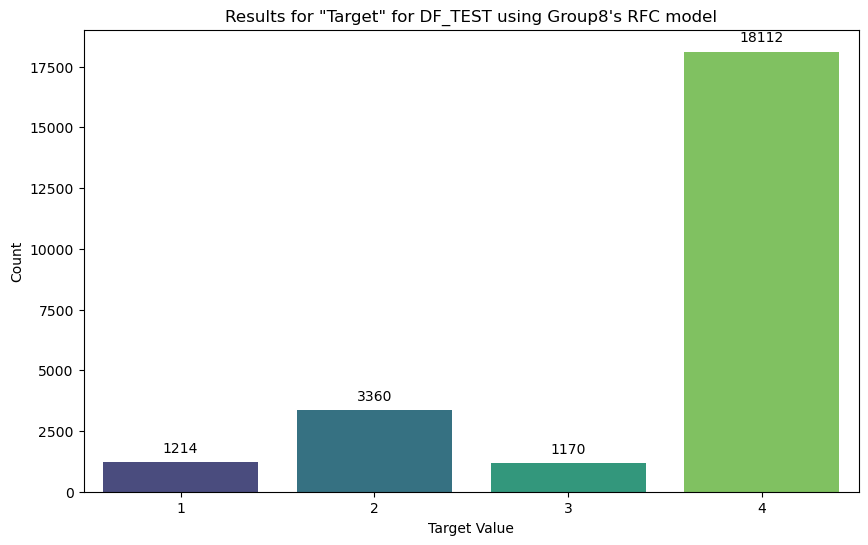

In [831]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing the test data
# Ensure df_test has the same columns as X_data_0
X_test_data = df_test[X_data_col]

# Apply the same StandardScaler transformation
X_test_data_scaled = SS.transform(X_test_data) # Note: use transform, not fit_transform, to ensure the same scaling is applied
X_test_data_scaled = pd.DataFrame(X_test_data_scaled, columns=X_data_col)
X_test_data_Top50 = X_test_data_scaled[Top50Features]

# Make predictions using the trained RandomForest model
test_predictions = Model.predict(X_test_data_Top50)

# The test_predictions variable now contains the predicted target values for the df_test data
# Grouping the predictions by their counts
pred_counts = Counter(test_predictions)

print("The following are the results for \"Target\" for DF_TEST using Group8's optimized RFC model:")
print("F1 Score (Weighted):", f1_weighted)
print("Accuracy Score:", accuracy)
total_count = 0
for value, count in pred_counts.items():
    print(f"Target: {value} - Count: {count}")
    total_count += count

print("\nTotal number of predictions:", total_count)
print("Number of rows in X_test_data (df_test):", len(X_test_data))

# Convert the Counter object to a DataFrame for easy plotting
pred_counts_df = pd.DataFrame(list(pred_counts.items()), columns=['Target', 'Count'])

# Plotting the results
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Target', y='Count', data=pred_counts_df, palette='viridis')

plt.title('Results for "Target" for DF_TEST using Group8\'s RFC model')
plt.xlabel('Target Value')
plt.ylabel('Count')

# Annotating the bars with the actual values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

plt.show()


# END OF DOCUMENT

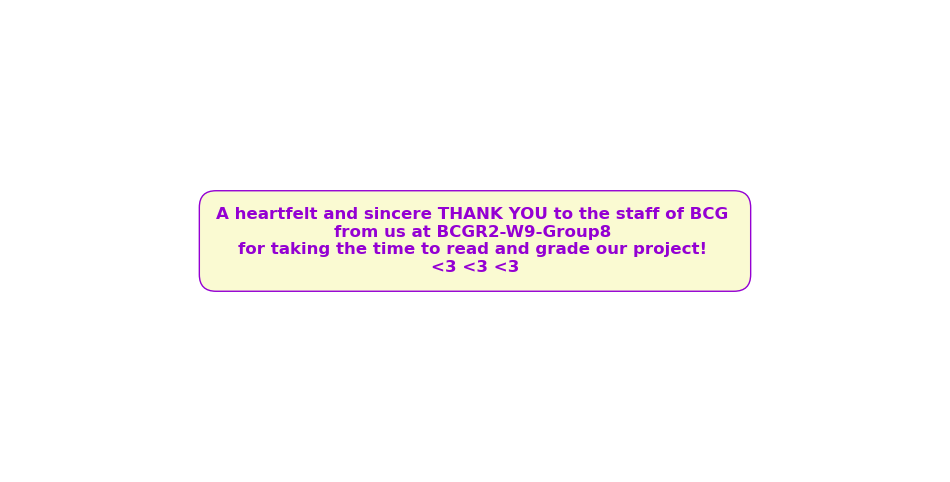

In [832]:
text = "A heartfelt and sincere THANK YOU to the staff of BCG \nfrom us at BCGR2-W9-Group8 \nfor taking the time to read and grade our project! \n<3 <3 <3"

plt.figure(figsize=(12, 6))

# Using a vibrant color
plt.text(0.5, 0.5, text,
         fontsize=12,
         ha='center',
         va='center',
         color='darkviolet',
         backgroundcolor='yellow',
         fontweight='bold',
         bbox=dict(boxstyle="round,pad=1", edgecolor="darkviolet", facecolor="lightgoldenrodyellow"))

# Removing the axis for clean visualization
plt.axis('off')

plt.show()
